In [48]:
# WARNING FOR HELP WITH YFINANCE IN 2025 SEE THIS VIDEO : https://youtu.be/037_883wHGo?si=q1wuu8qXLMlXbeWd

import yfinance as yf  # Import the yfinance library for downloading financial data
import pandas as pd  # Import pandas for data manipulation
import importlib  # Import importlib for reloading modules
from datetime import datetime
from pandas.tseries.offsets import DateOffset
import utils  # Import a custom module named utils
importlib.reload(utils)  # Reload the utils module to ensure it's updated

# List of asset symbols to download historical data for.
assets = []
assets = [
    "SPY",
    "ISRG",        # Intuitive Surgical
    "SYK",         # Stryker Corporation
    "EL.PA",       # EssilorLuxottica 
    "VEEV",        # Veeva Systems Inc 
    "RMD",         # ResMed Inc.
    "DHR",         # Danaher Corporation
    "TXN",         # Texas Instruments
    "COH.AX",      # Cochlear Limited
    "PME.AX",      # Pro Medicus Limited
    "STMN.SW",     # Straumann Holding AG
    "7741.T",      # HOYA Corporation 
    "EQS.PA",      # Pharmagest Interactive SA
    "EW",          # Edwards Lifesciences Corporation
    "4543.T",      # Terumo Corporation
    "7747.T",      # Asahi Intecc Co., Ltd
    "GRMN",         # Garmin 
    "TMO",          # Thermo Fisher Scientific Inc
    "NXU.DE",         #Nexus
    "SECT-B.ST",      #Sectra AB
    "7716.T",         #Nakanishi Inc
]

currency_pairs = [
    "CHFUSD=X",  # CHF en USD 
    "AUDUSD=X",  # AUD en USD 
    "JPYUSD=X",  # JPY en USD 
    "SEKUSD=X",  # SEK en USD 
    "EURUSD=X",  # EUR en USD 
    "SEKUSD=X"   # SEK en USD
]

start_date = datetime(2013, 12, 1)
end_date = datetime(2024, 12, 31)

monthly_currency_data = yf.download(currency_pairs, interval="1mo", start=start_date, end=end_date)["Close"]
monthly_price_data = yf.download(assets, interval="1mo", start=start_date, end=end_date)["Close"]

# Print a success message to confirm that data for all assets was imported
for i in range(len(monthly_price_data["SPY"])):
    idx = monthly_price_data.index[i]
    monthly_price_data.loc[idx, "EL.PA"] = monthly_currency_data.loc[idx, "EURUSD=X"] * monthly_price_data.loc[idx, "EL.PA"]
    monthly_price_data.loc[idx, "EQS.PA"] = monthly_currency_data.loc[idx, "EURUSD=X"] * monthly_price_data.loc[idx, "EQS.PA"]
    monthly_price_data.loc[idx, "NXU.DE"] = monthly_currency_data.loc[idx, "EURUSD=X"] * monthly_price_data.loc[idx, "NXU.DE"]
    monthly_price_data.loc[idx, "SECT-B.ST"] = monthly_currency_data.loc[idx, "SEKUSD=X"] * monthly_price_data.loc[idx, "SECT-B.ST"]
    monthly_price_data.loc[idx, "STMN.SW"] = monthly_currency_data.loc[idx, "CHFUSD=X"] * monthly_price_data.loc[idx, "STMN.SW"]
    monthly_price_data.loc[idx, "COH.AX"] = monthly_currency_data.loc[idx, "AUDUSD=X"] * monthly_price_data.loc[idx, "COH.AX"]
    monthly_price_data.loc[idx, "PME.AX"] = monthly_currency_data.loc[idx, "AUDUSD=X"] * monthly_price_data.loc[idx, "PME.AX"]
    monthly_price_data.loc[idx, "7741.T"] = monthly_currency_data.loc[idx, "JPYUSD=X"] * monthly_price_data.loc[idx, "7741.T"]
    monthly_price_data.loc[idx, "4543.T"] = monthly_currency_data.loc[idx, "JPYUSD=X"] * monthly_price_data.loc[idx, "4543.T"]
    monthly_price_data.loc[idx, "7747.T"] = monthly_currency_data.loc[idx, "JPYUSD=X"] * monthly_price_data.loc[idx, "7747.T"]
    monthly_price_data.loc[idx, "7716.T"] = monthly_currency_data.loc[idx, "JPYUSD=X"] * monthly_price_data.loc[idx, "7716.T"]
print("Monthly prices for all selected assets have been successfully imported.")

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  21 of 21 completed


Date
2013-12-01    150.918411
2014-01-01    146.389267
2014-02-01    153.052261
2014-03-01    153.643814
2014-04-01    155.394638
                 ...    
2024-08-01    558.391541
2024-09-01    568.376953
2024-10-01    565.032837
2024-11-01    598.727661
2024-12-01    582.362244
Name: SPY, Length: 133, dtype: float64
Date
2013-12-01    1.381006
2014-01-01    1.355877
2014-02-01    1.370746
2014-03-01    1.375213
2014-04-01    1.381368
                ...   
2024-08-01    1.106195
2024-09-01    1.116982
2024-10-01    1.085918
2024-11-01    1.058089
2024-12-01    1.040615
Name: EURUSD=X, Length: 133, dtype: float64
Monthly prices for all selected assets have been successfully imported.
Date
2013-12-01    150.918411
2014-01-01    146.389267
2014-02-01    153.052261
2014-03-01    153.643814
2014-04-01    155.394638
                 ...    
2024-08-01    558.391541
2024-09-01    568.376953
2024-10-01    565.032837
2024-11-01    598.727661
2024-12-01    582.362244
Name: SPY, Length: 133, dty

In [36]:
from utils import TotalReturnIndexCalculator  # Import the TotalReturnIndexCalculator class from the utils module

# Initialize an instance of the TotalReturnIndexCalculator class
totalreturnindexcalculator = TotalReturnIndexCalculator()

# Initialize a dictionary to store the annual returns for each asset
annual_returns_dict = {}
monthly_returns_dict = {}

# Calculate the annual returns for each asset using monthly price data
for asset in assets:
    # Calculate annual simple returns for the current asset and store them in the dictionary
    annual_returns_dict[asset] = totalreturnindexcalculator.annual_simple_returns(monthly_price_data[asset])
    monthly_returns_dict[asset] = totalreturnindexcalculator.monthly_simple_returns(monthly_price_data[asset])

# Print a confirmation message to indicate successful calculation
print("Annual returns for all assets have been successfully calculated and stored.")

Annual returns for all assets have been successfully calculated and stored.


In [38]:
from utils import Calculator  # Import the Calculator class from the utils module

# Initialize an instance of the Calculator class
calculator = Calculator()

# Download T-Bill rates (expressed in annualized percentage points)
t_bill_data = yf.download("^IRX", interval="1d", start=pd.to_datetime(start_date) + DateOffset(months=1), end=end_date)["Close"]["^IRX"]

annual_avg = t_bill_data.groupby([t_bill_data.index.year]).mean()
monthly_avg = t_bill_data.groupby([t_bill_data.index.year, t_bill_data.index.month]).mean()

annual_t_bill_returns = list((annual_avg / 100))  # Convert to decimal
monthly_t_bill_returns = list((monthly_avg / 100))

monthly_rf_rates = [(1 + rate) ** (1/12) - 1 for rate in monthly_t_bill_returns]

rf = calculator.mean(monthly_rf_rates)

annual_excess_returns = {}
#monthly_excess_returns = {}
for asset in assets:
    annual_excess_returns_asset = []
    #monthly_excess_returns_asset = []
    for i in range(0, len(annual_returns_dict[asset])):
        annual_excess_returns_asset.append(annual_returns_dict[asset][i] - annual_t_bill_returns[i])
    annual_excess_returns[asset] = annual_excess_returns_asset
    #for j in range(0, len(monthly_returns_dict[asset])):
        #monthly_excess_returns_asset.append(monthly_returns_dict[asset][i] - monthly_t_bill_returns[i])
    #monthly_excess_returns[asset] = monthly_excess_returns_asset  

# Initialize dictionaries to store calculated metrics for each asset
mean_dict = {}  # Dictionary for arithmetic mean of returns
standard_deviation_dict = {}  # Dictionary for standard deviation of returns
sharpe_ratio_dict = {}  # Dictionary for Sharpe Ratio of returns

# Calculate metrics for each asset and store in corresponding dictionaries
for asset in assets:
    mean_dict[asset] = calculator.mean(annual_returns_dict[asset])  # Arithmetic mean of annual returns
    standard_deviation_dict[asset] = calculator.standard_deviation(annual_returns_dict[asset])  # Standard deviation of annual returns
    sharpe_ratio_dict[asset] = calculator.sharpe_ratio(annual_excess_returns[asset])  # Sharpe Ratio using the risk-free rate

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Arithmetic Mean": list(mean_dict.values()),  # Arithmetic mean of returns for each asset
    "Standard Deviation": list(standard_deviation_dict.values()),  # Standard deviation of returns for each asset
     "Sharpe Ratio": list(sharpe_ratio_dict.values())  # Sharpe Ratio for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

[*********************100%***********************]  1 of 1 completed

        Asset  Arithmetic Mean  Standard Deviation  Sharpe Ratio
0         SPY         0.141219            0.148559      0.856992
1        ISRG         0.282043            0.245692      1.088736
2         SYK         0.175537            0.136288      1.174248
3       EL.PA         0.106622            0.155626      0.587311
4        VEEV         0.242302            0.364456      0.618240
5         RMD         0.191406            0.210789      0.814777
6         DHR         0.225738            0.265115      0.763949
7         TXN         0.186398            0.181088      0.907572
8      COH.AX         0.158941            0.224885      0.633724
9      PME.AX         0.746451            0.521764      1.403517
10    STMN.SW         0.269129            0.387222      0.642746
11     7741.T         0.188015            0.238150      0.716177
12     EQS.PA         0.136894            0.396720      0.298309
13         EW         0.237311            0.327827      0.657844
14     4543.T         0.1

In [40]:
geometric_mean_dict = {}  # Dictionary for geometric mean of returns
for asset in assets:
    geometric_mean_dict[asset] = calculator.geometric_mean(annual_returns_dict[asset])  # Geometric mean of annual returns

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Geometric Mean": list(geometric_mean_dict.values()),  # Geometric mean of returns for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

        Asset  Geometric Mean
0         SPY        0.130612
1        ISRG        0.255625
2         SYK        0.167261
3       EL.PA        0.095546
4        VEEV        0.186323
5         RMD        0.170389
6         DHR        0.197565
7         TXN        0.172251
8      COH.AX        0.137492
9      PME.AX        0.663871
10    STMN.SW        0.200061
11     7741.T        0.161036
12     EQS.PA        0.076349
13         EW        0.189646
14     4543.T        0.122952
15     7747.T        0.127523
16       GRMN        0.182724
17        TMO        0.154145
18     NXU.DE        0.159354
19  SECT-B.ST        0.262594
20     7716.T        0.057658


        Asset      Beta  P-Value Beta  CAPM Expected Return
0         SPY  1.000000  0.000000e+00              0.011226
1        ISRG  1.250436  9.566059e-18              0.013709
2         SYK  0.886626  3.594465e-17              0.010102
3       EL.PA  0.924250  1.020562e-17              0.010475
4        VEEV  1.000400  8.144026e-07              0.011230
5         RMD  0.601323  7.834425e-05              0.007273
6         DHR  0.838853  5.335474e-09              0.009628
7         TXN  1.025068  2.139448e-21              0.011475
8      COH.AX  0.904699  5.513525e-12              0.010281
9      PME.AX  1.345865  4.444836e-08              0.014655
10    STMN.SW  1.116030  1.182779e-12              0.012376
11     7741.T  0.768519  1.831267e-07              0.008931
12     EQS.PA  0.871549  7.158798e-08              0.009952
13         EW  0.959226  1.958642e-08              0.010822
14     4543.T  0.561630  2.199400e-05              0.006880
15     7747.T  0.677994  1.867247e-04   

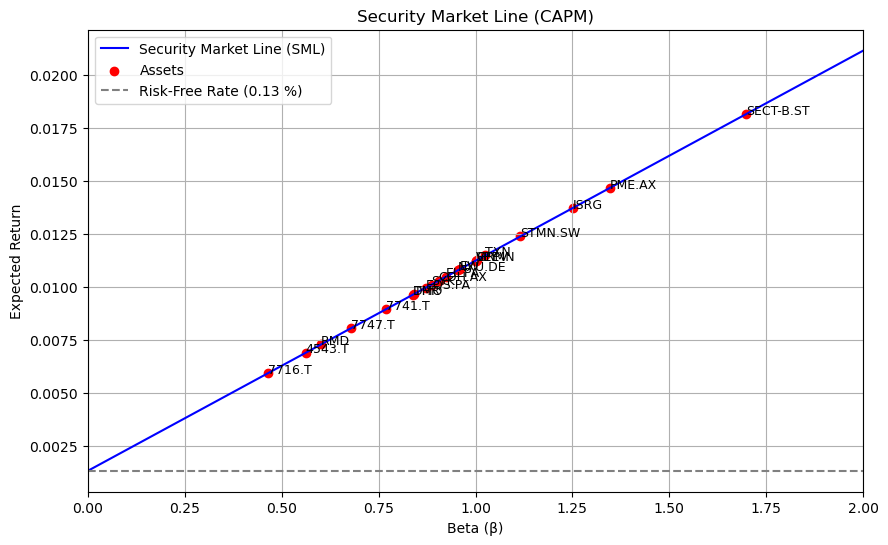

In [42]:
from utils import Capm  # Import the Capm class from the 'utils' module.

# Initialize an instance of the Capm class
capm = Capm()  # Create an object of the Capm class to access its methods.

# Initialize a dictionary to store CAPM metrics for each asset
capm_dict = {}  # This dictionary will hold CAPM metrics for all assets.

# Calculate CAPM metrics for each asset in comparison to the SPY (used as the market benchmark)
for asset in assets:  
    # For each asset in the list of assets:
    # - Perform CAPM regression using:
    #   1. The asset's annual returns (`annual_returns_dict[asset]`),
    #   2. The market benchmark's annual returns (`annual_returns_dict['SPY']`),
    #   3. The risk-free rate (`rf`).
    capm_dict[asset] = capm.regression(monthly_returns_dict[asset], monthly_returns_dict['SPY'], rf)

# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Create a pandas DataFrame from the CAPM dictionary.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys of the dictionary).
    "Beta": [v['beta'] for v in capm_dict.values()],  # Extract the beta coefficient for each asset.
    "P-Value Beta": [v['p_beta'] for v in capm_dict.values()],  # Extract the p-value of beta.
    "CAPM Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  # Extract the expected return.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame containing the CAPM results for all assets.

mean_market_return = calculator.mean(monthly_returns_dict["SPY"])
# Approximate the mean market return using the average return of the SPY (benchmark).

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate.
    mean_market_return,  # Mean market return (SPY in this case).
    [v['beta'] for v in capm_dict.values()],  # List of beta values for all assets.
    [v['capm_expected_return'] for v in capm_dict.values()],  # List of expected returns for all assets.
    list(capm_dict.keys())  # List of asset names for labeling the plot.
)

        Asset  Capm Expected Return         Alpha  P-Value Alpha  \
0         SPY              0.011226 -3.686287e-18   1.985918e-08   
1        ISRG              0.013709  8.796551e-03   1.173824e-01   
2         SYK              0.010102  4.615254e-03   2.567030e-01   
3       EL.PA              0.010475 -9.847638e-04   8.118885e-01   
4        VEEV              0.011230  8.578270e-03   3.199212e-01   
5         RMD              0.007273  8.974092e-03   1.737566e-01   
6         DHR              0.009628  8.063604e-03   1.791631e-01   
7         TXN              0.011475  3.810726e-03   3.411182e-01   
8      COH.AX              0.010281  3.035059e-03   5.683250e-01   
9      PME.AX              0.014655  3.659604e-02   5.320997e-04   
10    STMN.SW              0.012376  6.663080e-03   2.927908e-01   
11     7741.T              0.008931  6.471645e-03   2.989241e-01   
12     EQS.PA              0.009952 -2.229397e-04   9.738523e-01   
13         EW              0.010822  7.838221e-0

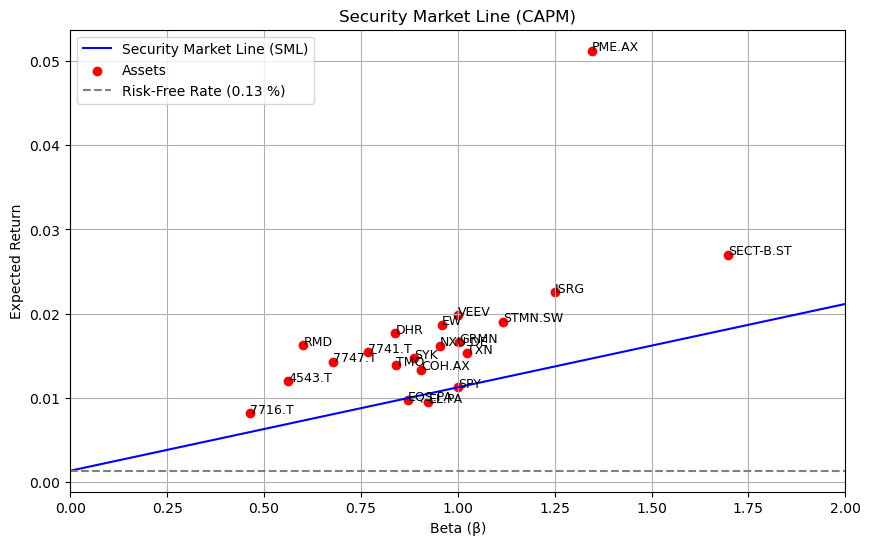

In [44]:
# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Initialize a pandas DataFrame with columns based on the CAPM results.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys from the CAPM dictionary).
    "Capm Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  
    # Add a column for the expected return of each asset based on the CAPM formula.
    "Alpha": [v['alpha'] for v in capm_dict.values()],  
    # Add a column for alpha values (excess return not explained by the market).
    "P-Value Alpha": [v['p_alpha'] for v in capm_dict.values()],
    # Add a column for p-values of alpha (statistical significance of alpha).
    "Alpha Adjusted Expected Return": [v['alpha_adjusted_expected_return'] for v in capm_dict.values()]
    # Add a column for the adjusted expected return that includes both CAPM expected return and alpha.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame to summarize the calculated CAPM metrics for all assets.

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate: a required parameter for plotting the SML.
    mean_market_return,  # Mean market return: typically derived from SPY as a proxy for the market portfolio.
    [v['beta'] for v in capm_dict.values()],  # Extract beta values for all assets for the SML plot.
    [v['alpha_adjusted_expected_return'] for v in capm_dict.values()],  
    # Use alpha-adjusted expected returns for plotting points on the SML.
    list(capm_dict.keys())  # Provide the list of asset names for labeling the points on the SML plot.
)
